In [1]:
#name of the library used for analysis
import pandas as pd
import matplotlib.pyplot as plt
import pysiology

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


In [2]:
# create dataframe, specify file path, skip rows, name columns
df = pd.read_csv(r'C:\Users\Raymond\test_001_001_Odau_1.csv', 
                 skiprows=3, usecols="Frame,Analog_1,Analog_2,Analog_3,Analog_4,Analog_5,Analog_6,Analog_7,Analog_8".split(","))

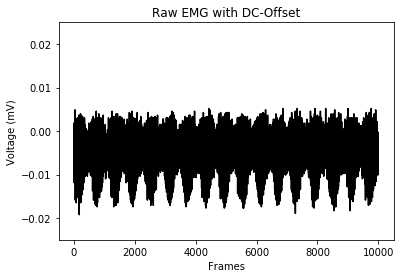

In [3]:
# plot with y-range, labels, title, black colored line graph
plt.ylim(-0.025,0.025) 
plt.xlabel('Frames')
plt.ylabel('Voltage (mV)')
plt.title('Raw EMG with DC-Offset')
plt.plot(df['Frame'],df['Analog_1'], color='k')

In [4]:
# analyze EMG content
analyzed1 = pysiology.electromyography.analyzeEMG(df['Analog_1'], 1000, preprocessing=True, lowpass=50, highpass=20, threshold=0.01, nseg=3, phasic_seconds=4)

In [5]:
# remove DC bias
df['Analog_1'] = df['Analog_1'] - df['Analog_1'].mean()

In [6]:
# FWR
df['Analog_1'] = df['Analog_1'].abs()

In [7]:
# low pass filter
df['Analog_1'] = pysiology.electromyography.butter_lowpass_filter(df['Analog_1'], 50, 1000, 5)

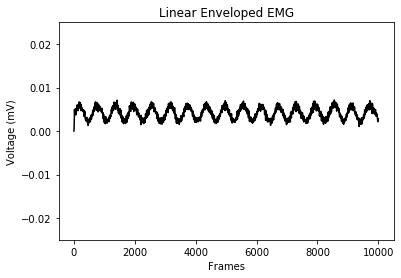

In [8]:
# plot with y-range, labels, title, black colored line graph
plt.ylim(-0.025,0.025) 
plt.xlabel('Frames')
plt.ylabel('Voltage (mV)')
plt.title('Linear Enveloped EMG')
plt.plot(df['Frame'],df['Analog_1'], color='k')

In [9]:
# documention: https://pysiology.readthedocs.io/en/latest/electromiography.html